

# Instalando Darknet



Primero actualizamos o instalamos unas bibliotecas que vamos a utilizar.

In [ ]:
!sudo apt-get install build-essential git libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
git is already the newest version (1:2.25.1-1ubuntu3.11).
libopencv-dev is already the newest version (4.2.0+dfsg-5+focal2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


Con este fragmento de código vamos a obtener la arquitectura de la GPU que está utilizando la máquina. Si al final no se encuentra es necesario editar el código con la información en los comentarios para incluir la arquitectura a utilizar ya que se utiliza durante la instalación de darknet.

In [ ]:
!nvidia-smi
# FUENTE: https://colab.research.google.com/drive/1mzL6WyY9BRx4xX476eQdhKDnd_eixBlG
# This cell ensures you have the correct architecture for your respective GPU
# If you command is not found, look through these GPUs, find the respective
# GPU and add them to the archTypes dictionary

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# Tesla K80
# ARCH= -gencode arch=compute_37,code=sm_37

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla P40, Tesla P4
# ARCH= -gencode arch=compute_61,code=sm_61

# GP100/Tesla P100 - DGX-1
# ARCH= -gencode arch=compute_60,code=sm_60

# For Jetson TX1, Tegra X1, DRIVE CX, DRIVE PX - uncomment:
# ARCH= -gencode arch=compute_53,code=[sm_53,compute_53]

# For Jetson Tx2 or Drive-PX2 uncomment:
# ARCH= -gencode arch=compute_62,code=[sm_62,compute_62]
import os
os.environ['GPU_TYPE'] = str(os.popen('nvidia-smi --query-gpu=name --format=csv,noheader').read())

def getGPUArch(argument):
  try:
    argument = argument.strip()
    # All Colab GPUs
    archTypes = {
        "Tesla V100-SXM2-16GB": "-gencode arch=compute_70,code=[sm_70,compute_70]",
        "Tesla K80": "-gencode arch=compute_37,code=sm_37",
        "Tesla T4": "-gencode arch=compute_75,code=[sm_75,compute_75]",
        "Tesla P40": "-gencode arch=compute_61,code=sm_61",
        "Tesla P4": "-gencode arch=compute_61,code=sm_61",
        "Tesla P100-PCIE-16GB": "-gencode arch=compute_60,code=sm_60"

      }
    return archTypes[argument]
  except KeyError:
    return "GPU must be added to GPU Commands"
os.environ['ARCH_VALUE'] = getGPUArch(os.environ['GPU_TYPE'])

print("GPU Type: " + os.environ['GPU_TYPE'])
print("ARCH Value: " + os.environ['ARCH_VALUE'])

Mon May 22 18:33:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Con este fragmento vamos a instalar darknet. Dentro del parámetro ARCH hay que cambiar a la arquitectura obtenida con el fragmento de código anterior (esto lo hace automaticamente el script).

In [ ]:
%cd /content
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/g' Makefile
!sed -i "s/ARCH= -gencode arch=compute_60,code=sm_60/ARCH= ${ARCH_VALUE}/g" Makefile
!make
!sudo cp libdarknet.so /usr/local/lib/
!sudo cp include/darknet.h /usr/local/include/
!sudo ldconfig
!wget https://github.com/AlexeyAB/darknet/releases/download/yolov4/yolov4.weights

/content
Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 4 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.17 MiB | 23.56 MiB/s, done.
Resolving deltas: 100% (10413/10413), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-

# Pruebas con Darknet para ver si funciona

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 

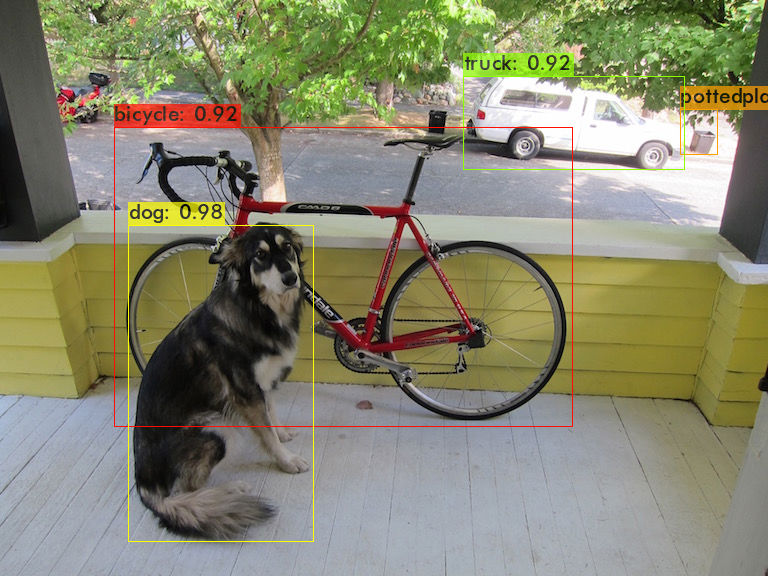

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -thresh 0.25 data/dog.jpg
img = cv2.imread("predictions.jpg")
cv2_imshow(img)

/content/darknet
 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    224 x 224 x   3 ->  112 x 112 x  32 0.022 BF
   1 conv     32       1 x 1/ 1    112 x 112 x  32 ->  112 x 112 x  32 0.026 BF
   2 conv     32/  32  3 x 3/ 1    112 x 112 x  32 ->  112 x 112 x  32 0.007 BF
   3 conv     16       1 x 1/ 1    112 x 112 x  32 ->  112 x 112 x  16 0.013 BF
   4 conv     96       1 x 1/ 1    112 x 112 x  16 ->  112 x 112 x  96 0.039 BF
   5 conv     96/  96  3 x 3/ 2    112 x 112 x  96 ->   56 x  56 x  96 0.005 BF
   6 conv     24       1 x 1/ 1     56 x  56 x  96 ->   56 x  56 x  24 0.014 BF
   7 conv    144       1 x 1/ 1     56 x  56 x  24 ->   56 x  56 x 144 0.022 BF
   

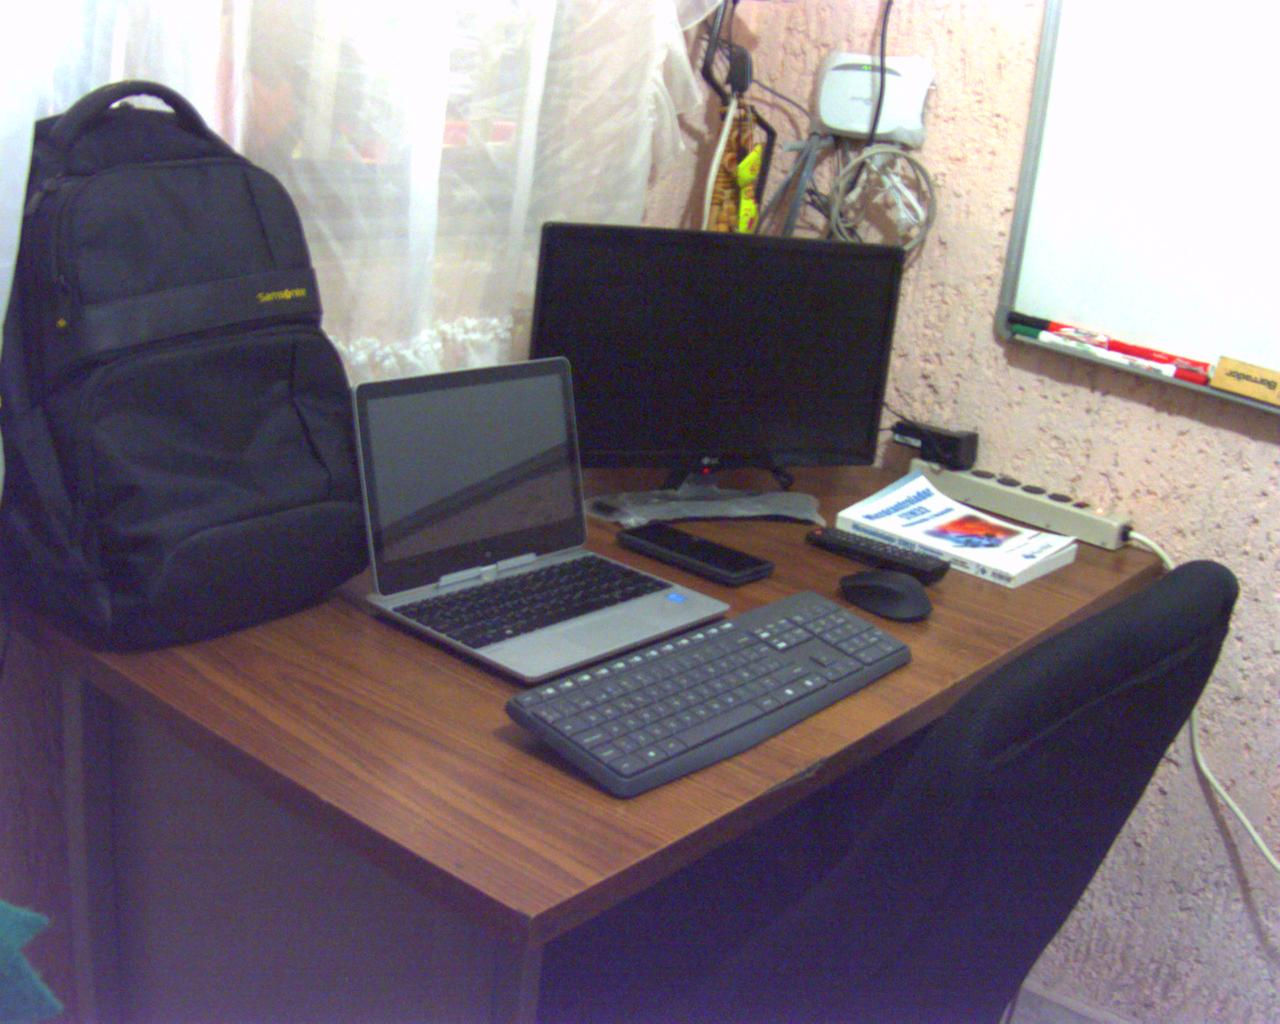

In [ ]:
!pwd
!./darknet detector test ../imagenet1k.data mobilenet/test.cfg mobilenet/test.weights -thresh 0.25 ../1.jpg
img = cv2.imread("predictions.jpg")
cv2_imshow(img)

# Instalando DarkHelp

Ahora vamos a instalar DarkHelp, una API de C++ para darknet que nos facilita trabajar con Darknet.

In [ ]:
%cd /content
!sudo apt-get install cmake build-essential libtclap-dev libmagic-dev libopencv-dev
!git clone https://github.com/stephanecharette/DarkHelp.git
%cd DarkHelp
!mkdir build
%cd build
!cmake -DCMAKE_BUILD_TYPE=Release ..
!make
!make package
!sudo dpkg -i darkhelp-*.deb

/content
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
libopencv-dev is already the newest version (4.2.0+dfsg-5+focal2).
The following NEW packages will be installed:
  libmagic-dev libtclap-dev
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 216 kB of archives.
After this operation, 1,067 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libmagic-dev amd64 1:5.38-4 [88.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libtclap-dev amd64 1.2.2-1 [127 kB]
Fetched 216 kB in 1s (322 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to f

# Pruebas
Montamos el drive y ejecutamos las pruebas con darkhelp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /usr/include/
!pwd
!sudo mv opencv4/opencv2 opencv2

/usr/include
/usr/include


In [ ]:
%cd /content/drive/MyDrive/"Testing"/"Yolo darknet final"/
!pwd
!mkdir Yolo_V4_Results
!mkdir Yolo_V4_Results/iDS
!mkdir Yolo_V4_Results/Realsense
!mkdir Yolo_V4_Results/PerfectChoice

!mkdir Yolo_V7_Results
!mkdir Yolo_V7_Results/iDS
!mkdir Yolo_V7_Results/Realsense
!mkdir Yolo_V7_Results/PerfectChoice

/content/drive/MyDrive/Yolo testing/Yolo darknet final
/content/drive/MyDrive/Yolo testing/Yolo darknet final
mkdir: cannot create directory ‘Yolo_V4_Results’: File exists
mkdir: cannot create directory ‘Yolo_V4_Results/iDS’: File exists
mkdir: cannot create directory ‘Yolo_V4_Results/Realsense’: File exists
mkdir: cannot create directory ‘Yolo_V4_Results/PerfectChoice’: File exists
mkdir: cannot create directory ‘Yolo_V7_Results’: File exists
mkdir: cannot create directory ‘Yolo_V7_Results/iDS’: File exists
mkdir: cannot create directory ‘Yolo_V7_Results/Realsense’: File exists
mkdir: cannot create directory ‘Yolo_V7_Results/PerfectChoice’: File exists


In [ ]:
!g++ yoloV7testing.cpp -o yolotesting -ldarkhelp -ldarknet $(pkg-config --libs opencv4)

In [ ]:
!./yolotesting

Cargando nombre de las clases...
Cargando red neuronal...
Yolo_V7_Results/iDS/escena1_1
Guardando resultados...
prediction results: 13
-> 1/13: "remote 36%" #65 prob=0.361317 x=592 y=486 w=234 h=39 tile=0 entries=1
-> 2/13: "keyboard 53%" #66 prob=0.525826 x=394 y=554 w=281 h=98 tile=0 entries=1
-> 3/13: "remote 57%" #65 prob=0.566954 x=916 y=463 w=218 h=89 tile=0 entries=1
-> 4/13: "tvmonitor 71%" #62 prob=0.70893 x=991 y=1 w=287 h=414 tile=0 entries=1
-> 5/13: "remote 78%" #65 prob=0.783843 x=804 y=525 w=148 h=63 tile=0 entries=1
-> 6/13: "mouse 82%" #64 prob=0.821127 x=839 y=570 w=93 h=52 tile=0 entries=1
-> 7/13: "book 88%" #73 prob=0.879734 x=834 y=468 w=245 h=122 tile=0 entries=1
-> 8/13: "chair 88%" #56 prob=0.88101 x=538 y=560 w=701 h=462 tile=0 entries=1
-> 9/13: "backpack 91%" #24 prob=0.908298 x=0 y=81 w=373 h=572 tile=0 entries=1
-> 10/13: "tvmonitor 92%" #62 prob=0.91842 x=528 y=225 w=377 h=248 tile=0 entries=1
-> 11/13: "cell phone 93%" #67 prob=0.93146 x=613 y=520 w=167 

In [ ]:
drive.flush_and_unmount()

# Entrenando

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/darknet
!./darknet detector -dont_show train /content/drive/MyDrive/Training/yolo_v7_tiny/Dataset.data /content/drive/MyDrive/Training/yolo_v7_tiny/Dataset.cfg /content/drive/MyDrive/Training/yolo_v7_tiny/Dataset_last.weights

Se truncaron las últimas líneas 5000 del resultado de transmisión.
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 98 Avg (IOU: 0.862417), count: 10, class_loss = 2.165967, iou_loss = 0.110865, total_loss = 2.276832 
 total_bbox = 991498, rewritten_bbox = 0.708120 % 
]2;4968/10000: loss=2.5 hours left=2.0
 4968: 2.502820, 2.839215 avg loss, 0.002610 rate, 1.081133 seconds, 317952 images, 1.988281 hours left
Loaded: 0.000062 seconds
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 90 Avg (IOU: 0.000000), count: 1, class_loss = 0.000061, iou_loss = 0.000000, total_loss = 0.000061 
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.061845, iou_loss = 0.000000, total_loss = 0.061845 
v3 (iou loss, Normalizer: (iou: 0.05, obj: 1.00, cls: 0.50) Region 98 Avg (IOU: 0.789336), count: 9, class_loss = 3.185222, iou_loss = 0.102531, total_loss = 3.287753 
 total_bbox = 991507, rewritten_bbox = 

In [ ]:
drive.flush_and_unmount()